# Water Usage
Analysis by Wen-Yun Chang

January 2019

## Data source
The following data sets were retrieved from Gapminder World (www.gapminder.com):

**Water withdrawal (cu meters per person)** - Total annual quantity of freshwater withdrawn per person per year.

**Renewable water (cu meters per person)** - Actual quantity of renewable water resources per person per year. Renewable water resources refer to the average annual flow of rivers and recharge of groundwater generated from precipitation, which corresponds to the maximum theoretical yearly amount of water acutally available for a country at a given moment, and the resources shared with neighboring countries (geopolitical constraints) have been taken into account.

**Desalinated water produced (billion cu meters)** - Total quantity of the production of freshwater by desalination of brackish or saltwater (mostly for domestic purposes) during the given year.



## Questions
1. Which surveyed country has the highest or lowest water withdrawal per person?
2. How does the water withdrawal amount change over the years for the United States? 
3. How much renewal water do the surveyed countries have?
4. How many countries surveyed have water desalination? Which country has the highest water desalination (in billion cubic meters)? 

### Question 1: Which country has the highest or lowest water withdrawal per person?

In [1]:
# read in data files
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df_withdraw = pd.read_csv('water_withdrawal_cu_meters_per_person.csv')
df_withdraw.reset_index(drop=True, inplace=True)
df_withdraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 56 columns):
country    180 non-null object
1962       1 non-null float64
1963       0 non-null float64
1964       0 non-null float64
1965       1 non-null float64
1966       0 non-null float64
1967       0 non-null float64
1968       0 non-null float64
1969       0 non-null float64
1970       14 non-null float64
1971       0 non-null float64
1972       0 non-null float64
1973       0 non-null float64
1974       0 non-null float64
1975       28 non-null float64
1976       1 non-null float64
1977       0 non-null float64
1978       0 non-null float64
1979       0 non-null float64
1980       38 non-null float64
1981       0 non-null float64
1982       1 non-null float64
1983       0 non-null float64
1984       1 non-null float64
1985       30 non-null float64
1986       4 non-null float64
1987       28 non-null float64
1988       1 non-null float64
1989       1 non-null float64
1990       30 non-n

In [2]:
df_withdraw.head()

,country,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130.0,...,NaN,NaN,NaN,NaN,NaN,225.0,NaN,NaN,NaN,NaN
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,129.0,NaN,NaN,NaN,NaN


### Data wrangling
Given the large number of null values, I took the year 2000 with the most non-null values for comparisons among countries. Null values are dropped.


In [3]:
df_withdraw2 = df_withdraw.loc[:,['country','2000']].dropna().sort_values(by='2000', ascending=False)
df_withdraw2.describe()

,2000
count,65.000000
mean,598.927692
std,839.307715
min,11.500000
25%,89.000000
50%,385.000000
75%,717.000000
max,5420.000000


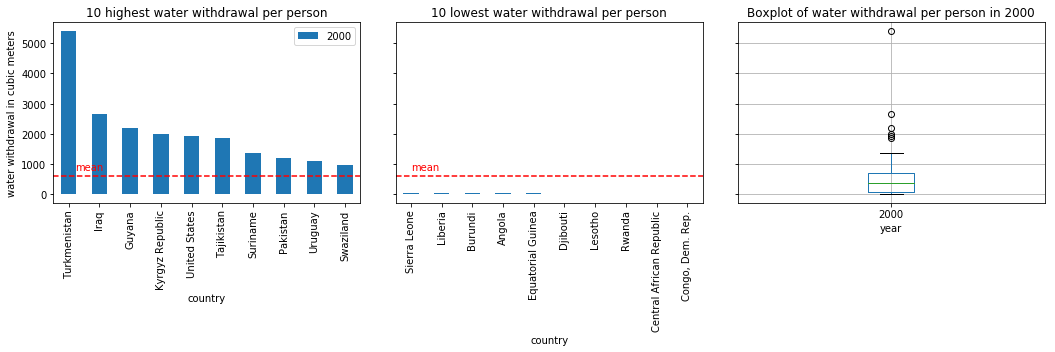

In [4]:
## Charting the year 2000 comparison

# 10 highest withdrawal
fig1, (ax1, ax2, ax3) = plt.subplots(1,3,sharey=True, figsize=(15,5))
df_withdraw2.head(10).plot.bar(x='country', ax=ax1);
ax1.set_title('10 highest water withdrawal per person')
ax1.set_ylabel('water withdrawal in cubic meters')
ax1.axhline(y=df_withdraw2['2000'].mean(), color='r', linestyle='--', label='mean')
ax1.annotate('mean', xy=(1,1), xytext=(0.2,800), color='r')

# 10 lowest withdrawal
df_withdraw2.tail(10).plot.bar(x='country', ax=ax2, legend=False);
ax2.set_title('10 lowest water withdrawal per person')
ax2.axhline(y=df_withdraw2['2000'].mean(), color='r', linestyle='--', label='mean')
ax2.annotate('mean', xy=(1,1), xytext=(0,800), color='r')

# Boxplot
df_withdraw2.boxplot();
ax3.set_title('Boxplot of water withdrawal per person in 2000')
ax3.set_xlabel('year')
ax3.set_ylabel('water withdrawal in cubic meters')

plt.tight_layout()

#### Conclusion 1:
The 'water withdrawal per person' data is not consistently collected every year. Year 2000 has the largest data set. In 2000, Turkmenistan has the highest water withdrawal of 5,420 cubic meters per person, while Democratic Republic of Congo has the lowest at 11.5 cubic meters. The average is at 599 cubic meters and the median is at 385 cubic meters. The box plot shows the outliers.

#### Limitations 1:
The data set is limited; only year 2000 had 65 countries surveyed. The data did not seemed to be collected at regular intervals, and could not support analysis across the years for most countries.

### Question 2: How much water has the United States been withdrawing per person throughout the years?

In [5]:
df_us = df_withdraw[df_withdraw.country=='United States'].transpose().dropna()
df_us.columns = df_us.iloc[0]
#df_us.set_index(keys='country')
#df_us.drop(index='country')
df_us

country,United States
country,United States
1980,2210
1990,2170
2000,1940
2005,1860
2010,1540


#### Conclusion 2:
There are 5 years of non-null data for the United States from 1980 to 2010. The water withdrawal per person has been decreasing over the years. 


### Question 3: How much renewal water do the surveyed countries have?

In [6]:
df_renew = pd.read_csv('renewable_water_cu_meters_per_person.csv')
df_renew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 54 columns):
country    181 non-null object
1962       155 non-null float64
1963       0 non-null float64
1964       0 non-null float64
1965       0 non-null float64
1966       0 non-null float64
1967       155 non-null float64
1968       0 non-null float64
1969       0 non-null float64
1970       0 non-null float64
1971       0 non-null float64
1972       155 non-null float64
1973       0 non-null float64
1974       0 non-null float64
1975       0 non-null float64
1976       0 non-null float64
1977       155 non-null float64
1978       0 non-null float64
1979       0 non-null float64
1980       0 non-null float64
1981       0 non-null float64
1982       155 non-null float64
1983       0 non-null float64
1984       0 non-null float64
1985       0 non-null float64
1986       0 non-null float64
1987       155 non-null float64
1988       0 non-null float64
1989       0 non-null float64
1990       0

### Data wrangling
The survey seemed to be conducted about every 5 years. I extracted the recent years 2002, 2007, 2012 dat for further analysis.

In [7]:
df_renew2 = df_renew.loc[:,['country','2002','2007','2012']]
df_renew2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 4 columns):
country    181 non-null object
2002       178 non-null float64
2007       179 non-null float64
2012       181 non-null float64
dtypes: float64(3), object(1)
memory usage: 5.7+ KB


In [8]:
df_renew2.sort_values(by='2012', ascending=False)

,country,2002,2007,2012
74,Iceland,593000.00,557000.00,526000.00
70,Guyana,365000.00,363000.00,357000.00
39,"Congo, Rep.",255000.00,224000.00,194000.00
154,Suriname,204000.00,198000.00,187000.00
125,Papua New Guinea,142000.00,125000.00,112000.00
19,Bhutan,135000.00,114000.00,105000.00
60,Gabon,129000.00,115000.00,103000.00
30,Canada,92700.00,88000.00,83200.00
143,Solomon Islands,103000.00,90800.00,81400.00
120,Norway,86600.00,83300.00,78300.00


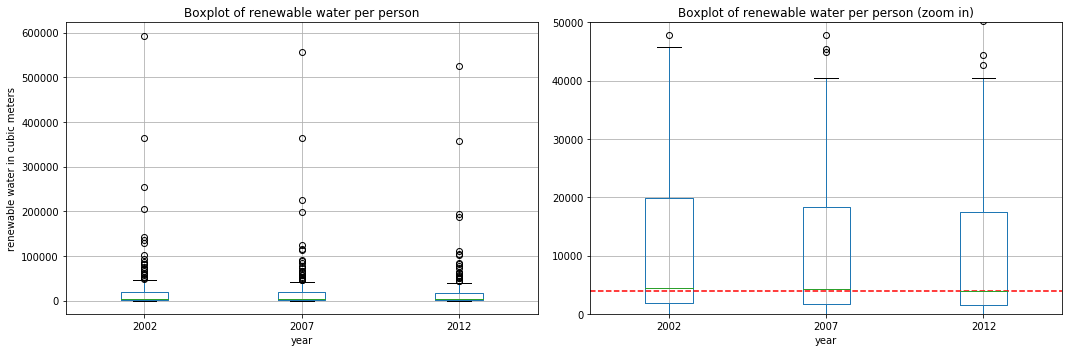

In [9]:
# Boxplot
fig2, (ax11, ax12) = plt.subplots(1,2, figsize=(15,5))
df_renew2.boxplot(ax=ax11);
ax11.set_title('Boxplot of renewable water per person')
ax11.set_xlabel('year')
ax11.set_ylabel('renewable water in cubic meters')

df_renew2.boxplot(ax=ax12);
ax12.axhline(y=df_renew2['2012'].median(), color='r', linestyle='--', label='mean')
ax12.set_ylim(0,50000)
ax12.set_title('Boxplot of renewable water per person (zoom in)')
ax12.set_xlabel('year')


plt.tight_layout()

#### Conclusion 3:
Iceland has access to the largest amount of renewable water per person. 
Comparing the data from 2002, 2007 and 2012, the median amount of renewal water per person is about the same, but the range maximum and outliers decreased.


#### Limitation 3:
This data set has much more regularity, mostly collected at 5 year interval. The number of countries surveyed per year is also consistently extensive from 155 to 181 countries. 

However the data collection years do not conincide with the year 2000 data in the first water withdrawal per person data set, so the 2 data sets could not be effectively compared.


### Question 4: How many countries surveyed have water desalination? Which country has the highest water desalination (in billion cubic meters)?

In [10]:
df_desal = pd.read_csv('desalinated_water_produced_billion_cu_meters.csv')
df_desal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 37 columns):
country    81 non-null object
1980       8 non-null float64
1981       0 non-null float64
1982       1 non-null float64
1983       0 non-null float64
1984       0 non-null float64
1985       8 non-null float64
1986       0 non-null float64
1987       2 non-null float64
1988       0 non-null float64
1989       1 non-null float64
1990       47 non-null float64
1991       4 non-null float64
1992       6 non-null float64
1993       5 non-null float64
1994       1 non-null float64
1995       15 non-null float64
1996       7 non-null float64
1997       12 non-null float64
1998       0 non-null float64
1999       0 non-null float64
2000       49 non-null float64
2001       5 non-null float64
2002       10 non-null float64
2003       4 non-null float64
2004       2 non-null float64
2005       20 non-null float64
2006       8 non-null float64
2007       17 non-null float64
2008       9 non-nul

In [11]:
# year 1990 and 2000 has the 2 biggest data set, so select those only
df_desal2 = df_desal.loc[:,['country','1990','2000']]
df_desal2.describe()

,1990,2000
count,47.000000,49.000000
mean,0.040144,0.033473
std,0.112131,0.098814
min,0.000050,0.000100
25%,0.000600,0.000300
50%,0.004800,0.004300
75%,0.024500,0.018000
max,0.580000,0.580000


#### Conclusion 4a:
In 1990, 47 countries survey has water desalination. In 2000, the number increased to 49.

In [12]:
# get total amount of water desalination production for each year
total_1990 = df_desal2['1990'].sum()
total_2000 = df_desal2['2000'].sum()
total_1990, total_2000

(1.88675, 1.6401999999999999)

In [13]:
# calculate the % of world's water desalination each country produces
df_desal2['1990%']=df_desal2['1990']/total_1990
df_desal2['2000%']=df_desal2['2000']/total_2000

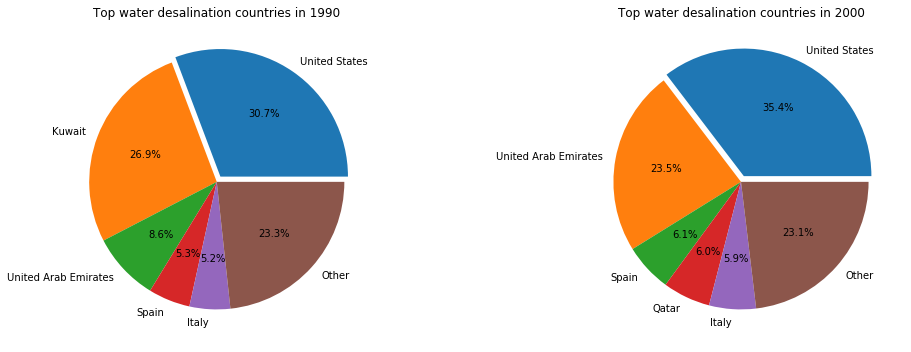

In [14]:
# plot pie charts of the top 5 water desalination countries in each year.
head5_1990 = df_desal2.sort_values(by='1990%',ascending=False).head(5)
head5_1990 = head5_1990.loc[:,['country','1990%']]
head5_1990 = head5_1990.append({'country':'Other', '1990%':1-sum(head5_1990['1990%'])}, ignore_index=True)

head5_2000 = df_desal2.sort_values(by='2000%',ascending=False).head(5)
head5_2000 = head5_2000.loc[:,['country','2000%']]
head5_2000 = head5_2000.append({'country':'Other', '2000%':1-sum(head5_2000['2000%'])}, ignore_index=True)

fig3, (ax31,ax32) = plt.subplots(1,2,figsize=(15,5))
explode = (0.05,0,0,0,0,0) # emphasize largest chunk
ax31.pie(head5_1990['1990%'], labels=head5_1990['country'], autopct='%1.1f%%', explode=explode);
ax31.set_title('Top water desalination countries in 1990')

ax32.pie(head5_2000['2000%'], labels=head5_2000['country'], autopct='%1.1f%%', explode=explode);
ax32.set_title('Top water desalination countries in 2000')

plt.tight_layout()

Text(0.5, 1.0, 'Top 10 water desalination countries in 2000')

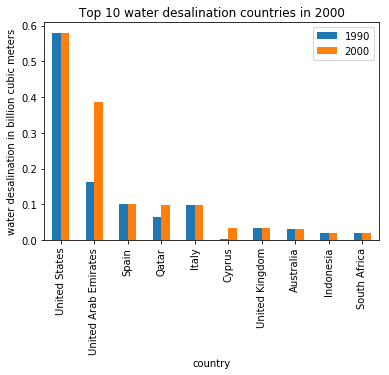

In [15]:
# To compare which countries have increased water desalination production, 
# drop countries without data on both years.
df_desal3 = df_desal2.dropna().copy()

# plot the top 10 water desalination countries in 2000
df_desal3.sort_values(by = '2000', ascending=False).head(10).plot.bar('country',['1990','2000'])
plt.ylabel('water desalination in billion cubic meters')
plt.title('Top 10 water desalination countries in 2000')

In [16]:
# find which countries have increased production from 1990 to 2000
df_desal3['10-year_vol_increase']= df_desal3['2000']-df_desal3['1990']
df_desal3['10-year_%_increase']= df_desal3['10-year_vol_increase']/df_desal3['1990']
df_desal3.sort_values(by = '10-year_%_increase', ascending=False).head(10)

,country,1990,2000,1990%,2000%,10-year_vol_increase,10-year_%_increase
16,Cyprus,0.0030,0.0335,0.001590,0.020424,0.0305,10.166667
76,United Arab Emirates,0.1630,0.3850,0.086392,0.234727,0.2220,1.361963
59,Qatar,0.0650,0.0990,0.034451,0.060358,0.0340,0.523077
29,Indonesia,0.0187,0.0190,0.009911,0.011584,0.0003,0.016043
1,Angola,0.0001,0.0001,0.000053,0.000061,0.0000,0.000000
51,Nicaragua,0.0002,0.0002,0.000106,0.000122,0.0000,0.000000
52,Nigeria,0.0030,0.0030,0.001590,0.001829,0.0000,0.000000
53,Norway,0.0001,0.0001,0.000053,0.000061,0.0000,0.000000
57,Poland,0.0070,0.0070,0.003710,0.004268,0.0000,0.000000
58,Portugal,0.0016,0.0016,0.000848,0.000975,0.0000,0.000000


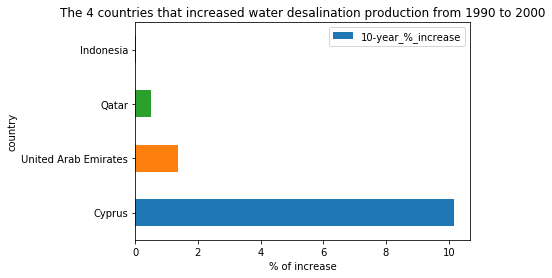

In [17]:
df_desal3.sort_values(by = '10-year_%_increase', ascending=False).head(4).plot.barh('country','10-year_%_increase')
plt.xlabel('% of increase')
plt.title('The 4 countries that increased water desalination production from 1990 to 2000');

#### Conclusion 4b:
World water desalination decreased from 1.88 billion cubic meters in 1990 to 1.64 billion cubic meters in 2000.

In both 1990 and 2000, United States produced the largest volume of water by desalination at 0.58 billion cubic meters, ahead of United Arab Emirates. However, the United States production volume has stayed the same, while United Arab Emirates has more than doubled their production in 10 years. Kuwait, the second highest water desalination production country in 1990, has no data in 2000.

Most countries with both years of data did not increase production. Only 4 countries increased production - Cyprus at 10.2%, United Arab Emirates at 1.4%, Qatar at 0.5% and Indonesia at 0.02%.

#### Limitation 4:
This data set is limited, with the most number of countries surveyed in years 1990 and 2000. This became the focus of my analysis. However, some countries are surveyed in only 1 of these 2 years, noticeably Kuwait, which had the second highest water desalination in 1990, but was not surveyed in 2000.